# Functions to divide dataset into subperiods
Divide main dataframe into smaller dataframes for each subperiod.
## divide_months

In [3]:
import pandas as pd
def divide_months(df):
    months = {}
    for month in range(1, 13):
        
        # Get hour string as two character string.
        month_str = ''
        if month < 10:
            month_str = '0' + str(month)
        else:
            month_str = str(month)
        months[month] = df[df['Timestamp'].str.contains('-' + month_str + '-')]
        
    return months

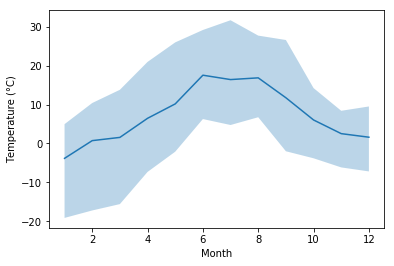

In [7]:
import datetime
from METCOMP_utils import *
import matplotlib.pyplot as plt

# Load data.
start_date = datetime.date(2019, 1, 1)
end_date = datetime.date(2019, 12, 31)
df_MESAN = read_CSV('40010', 'MESAN', start_date, end_date)
df_LANTMET = get_LANTMET('40010', start_date, end_date)

# Divide into months.
MESAN_months = divide_months(df_MESAN)

temps = []
temps_max = []
temps_min = []
for month in range(1, 13):
    temps.append(MESAN_months[month]['t_sfc'].mean(skipna=True) - 273.15)
    temps_min.append(MESAN_months[month]['t_sfc'].min(skipna=True) - 273.15)
    temps_max.append(MESAN_months[month]['t_sfc'].max(skipna=True) - 273.15)
    
# Plot avarage monthly temperature.
months = [i for i in range(1, len(MESAN_months) + 1)]
plt.plot(months, temps);
plt.fill_between(months, temps_min, temps_max, alpha=0.3);
plt.xlabel('Month');
plt.ylabel('Temperature (°C)');

## divide_weeks

In [8]:
import datetime
import pandas as pd

def divide_weeks(df):
    
    # Initialize variables.
    week = df.iloc[0]['Timestamp'].split('T')[0]
    week = datetime.datetime.strptime(week, '%Y-%m-%d').isocalendar()[1]
    prev_week = week
    weeks = {}
    start_index = 0
    end_index = 0
    
    # Loop over every row.
    for index, df_row in df.iterrows():
        
        # Find week number.
        current_dt = df_row['Timestamp'].split('T')[0]
        current_dt = datetime.datetime.strptime(current_dt, '%Y-%m-%d')
        week = current_dt.isocalendar()[1]
        
        # If change in current week, slice all rows appertaining to previous week and try to concatenate with previous dataframes.
        if not week == prev_week:       
            end_index = index
            try:
                # If previous data exists, concatenate dataframes
                weeks[prev_week] = pd.concat([weeks[prev_week], df_MESAN.iloc[start_index:end_index]])
            except KeyError:
                # If no previous data exists, initialize key and concatenate to None object.
                weeks[prev_week] = None
                weeks[prev_week] = pd.concat([weeks[prev_week], df_MESAN.iloc[start_index:end_index]])
            start_index = end_index
        
        prev_week = week
    
    return weeks

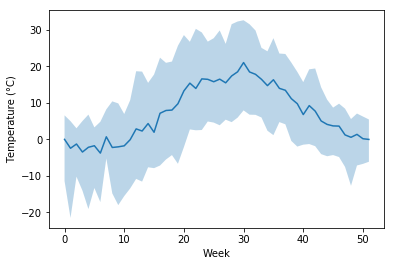

In [9]:
from METCOMP_utils import *
import matplotlib.pyplot as plt

# Load data.
start_date = datetime.date(2017, 1, 1)
end_date = datetime.date(2019, 12, 31)
df_MESAN = read_CSV('40010', 'MESAN', start_date, end_date)

# Divide into bins for each week
MESAN_weeks = divide_weeks(df_MESAN)

# Avarage temperatures for each week.
temps = []
temps_max = []
temps_min = []
for week in MESAN_weeks:
    temps.append(MESAN_weeks[week]['t_sfc'].mean(skipna=True) - 273.15)
    temps_min.append(MESAN_weeks[week]['t_sfc'].min(skipna=True) - 273.15)
    temps_max.append(MESAN_weeks[week]['t_sfc'].max(skipna=True) - 273.15)

# Plot avarage weekly temperature.
weeks = [i for i in range(0, len(MESAN_weeks))]
plt.plot(weeks, temps);
plt.fill_between(weeks, temps_min, temps_max, alpha=0.3);
plt.xlabel('Week');
plt.ylabel('Temperature (°C)');

# divide_hours

In [10]:
import pandas as pd
def divide_hours(df):
    
    hours = {}
    
    for hour in range(0, 23):
        
        # Get hour string as two character string.
        hour_str = ''
        if hour < 10:
            hour_str = '0' + str(hour)
        else:
            hour_str = str(hour)
        hours[hour] = df[df['Timestamp'].str.contains('T' + hour_str)]
        
    return hours

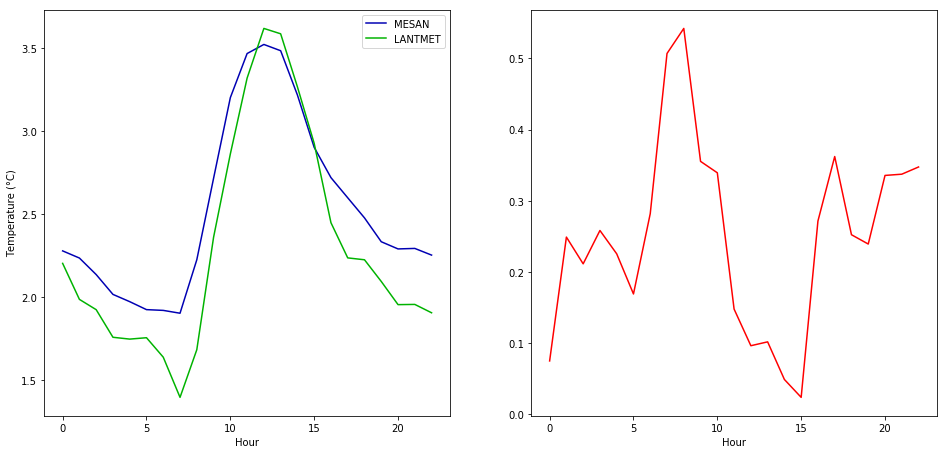

In [11]:
# Load data.
start_date = datetime.date(2019, 11, 1)
end_date = datetime.date(2019, 11, 30)
df_MESAN = read_CSV('40010', 'MESAN', start_date, end_date)
df_LANTMET = get_LANTMET('40010', start_date, end_date)

# Divide into hours.
MESAN_hours = divide_hours(df_MESAN)
LANTMET_hours = divide_hours(df_LANTMET)

# Get avarage error for each hour
temps_MESAN = []
temps_LANTMET = []
temps_ERROR = []
for hour in range(0, 23):
    temps_MESAN.append(MESAN_hours[hour]['t_sfc'].mean(skipna=True) - 273.15)
    temps_LANTMET.append(LANTMET_hours[hour]['TM'].mean(skipna=True))
    temps_ERROR.append(abs(temps_MESAN[hour] - temps_LANTMET[hour]))


hours = [i for i in range(0, 23)]
fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].plot(hours, temps_MESAN, color=[0.0, 0.0, 0.7], label='MESAN')
axs[0].plot(hours, temps_LANTMET, color=[0.0, 0.7, 0.0], label='LANTMET')
axs[0].set_ylabel('Temperature (°C)');
axs[0].set_xlabel('Hour');
axs[0].legend()
x0,x1 = axs[0].get_xlim()
y0,y1 = axs[0].get_ylim()
axs[0].set_aspect(abs(x1-x0)/abs(y1-y0))
        
axs[1].plot(hours, temps_ERROR, 'r')
axs[1].set_xlabel('Hour');
x0,x1 = axs[1].get_xlim()
y0,y1 = axs[1].get_ylim()
axs[1].set_aspect(abs(x1-x0)/abs(y1-y0))
